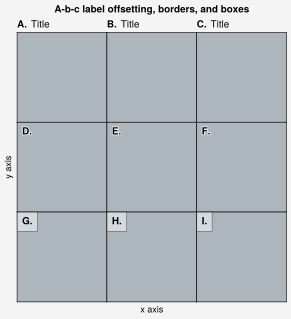

In [1]:
import proplot as pplt
fig = pplt.figure(space=0, refwidth='10em')
axs = fig.subplots(nrows=3, ncols=3)
axs.format(
    abc='A.', abcloc='ul',
    xticks='null', yticks='null', facecolor='gray5',
    xlabel='x axis', ylabel='y axis',
    suptitle='A-b-c label offsetting, borders, and boxes',
)
axs[:3].format(abcloc='l', titleloc='l', title='Title')
axs[-3:].format(abcbbox=True)  # also disables abcborder
# axs[:-3].format(abcborder=True)  # this is already the default

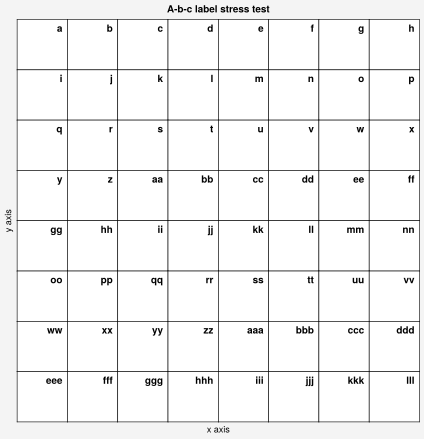

In [2]:
import proplot as pplt
fig = pplt.figure(space=0, refwidth=0.7)
axs = fig.subplots(nrows=8, ncols=8)
axs.format(
    abc=True, abcloc='ur',
    xlabel='x axis', ylabel='y axis', xticks=[], yticks=[],
    suptitle='A-b-c label stress test'
)

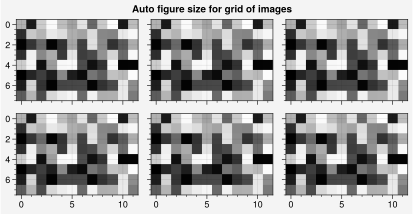

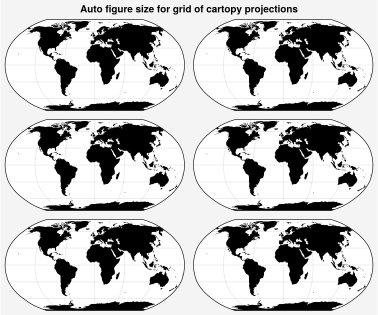

In [3]:
import proplot as pplt
import numpy as np

# Grid of images (note the square pixels)
state = np.random.RandomState(51423)
colors = np.tile(state.rand(8, 12, 1), (1, 1, 3))
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth=1.7)
fig.format(suptitle='Auto figure size for grid of images')
for ax in axs:
    ax.imshow(colors)

# Grid of cartopy projections
fig, axs = pplt.subplots(ncols=2, nrows=3, proj='robin')
axs.format(land=True, landcolor='k')
fig.format(suptitle='Auto figure size for grid of cartopy projections')

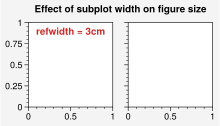

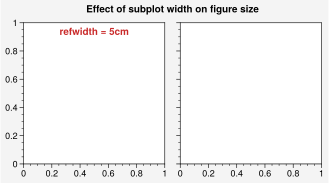

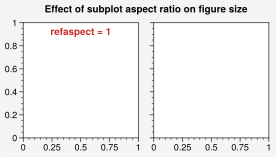

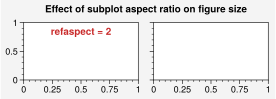

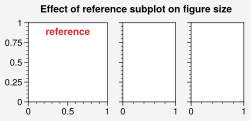

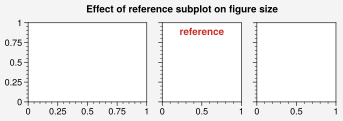

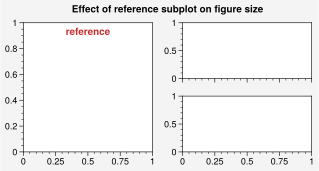

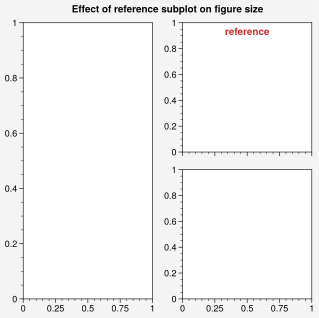

In [4]:
import proplot as pplt
pplt.rc.update(grid=False, titleloc='uc', titleweight='bold', titlecolor='red9')

# Change the reference subplot width
suptitle = 'Effect of subplot width on figure size'
for refwidth in ('3cm', '5cm'):
    fig, axs = pplt.subplots(ncols=2, refwidth=refwidth,)
    axs[0].format(title=f'refwidth = {refwidth}', suptitle=suptitle)

# Change the reference subplot aspect ratio
suptitle = 'Effect of subplot aspect ratio on figure size'
for refaspect in (1, 2):
    fig, axs = pplt.subplots(ncols=2, refwidth=1.6, refaspect=refaspect)
    axs[0].format(title=f'refaspect = {refaspect}', suptitle=suptitle)

# Change the reference subplot
suptitle = 'Effect of reference subplot on figure size'
for ref in (1, 2):  # with different width ratios
    fig, axs = pplt.subplots(ncols=3, wratios=(3, 2, 2), ref=ref, refwidth=1.1)
    axs[ref - 1].format(title='reference', suptitle=suptitle)
for ref in (1, 2):  # with complex subplot grid
    fig, axs = pplt.subplots([[1, 2], [1, 3]], refnum=ref, refwidth=1.8)
    axs[ref - 1].format(title='reference', suptitle=suptitle)

pplt.rc.reset()

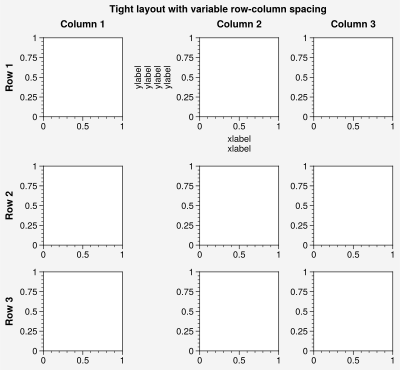

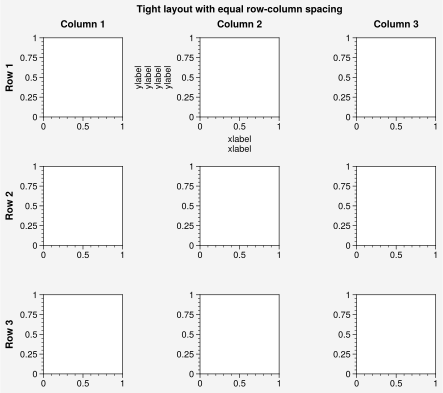

In [5]:
import proplot as pplt

# Stress test of the tight layout algorithm
# Add large labels along the edge of one subplot
for equal, descrip in enumerate(('variable', 'equal')):
    fig, axs = pplt.subplots(
        nrows=3, ncols=3, refwidth=1.1, share=False, equal=bool(equal)
    )
    axs[1].format(
        xlabel='xlabel\nxlabel',
        ylabel='ylabel\nylabel\nylabel\nylabel'
    )
    axs.format(
        grid=False,
        toplabels=('Column 1', 'Column 2', 'Column 3'),
        leftlabels=('Row 1', 'Row 2', 'Row 3'),
        suptitle=f'Tight layout with {descrip} row-column spacing',
    )

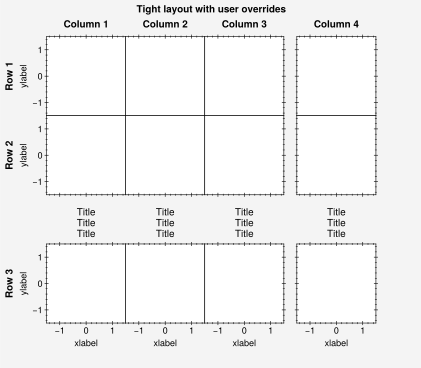

In [6]:
import proplot as pplt

# Stress test of the tight layout algorithm
# This time override the algorithm between selected subplot rows/columns
fig, axs = pplt.subplots(
    ncols=4, nrows=3, refwidth=1.1, span=False,
    bottom='5em', right='5em',  # margin spacing overrides
    wspace=(0, 0, None), hspace=(0, None),  # column and row spacing overrides
)
axs.format(
    grid=False,
    xlocator=1, ylocator=1, tickdir='inout',
    xlim=(-1.5, 1.5), ylim=(-1.5, 1.5),
    suptitle='Tight layout with user overrides',
    toplabels=('Column 1', 'Column 2', 'Column 3', 'Column 4'),
    leftlabels=('Row 1', 'Row 2', 'Row 3'),
)
axs[0, :].format(xtickloc='top')
axs[2, :].format(xtickloc='both')
axs[:, 1].format(ytickloc='neither')
axs[:, 2].format(ytickloc='right')
axs[:, 3].format(ytickloc='both')
axs[-1, :].format(xlabel='xlabel', title='Title\nTitle\nTitle')
axs[:, 0].format(ylabel='ylabel')

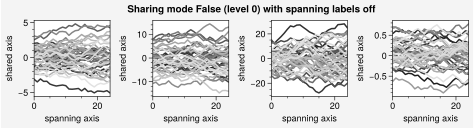

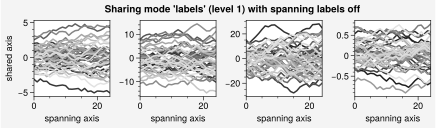

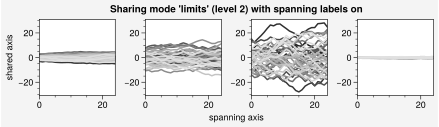

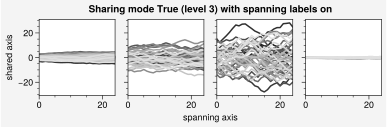

In [7]:
import proplot as pplt
import numpy as np
N = 50
M = 40
state = np.random.RandomState(51423)
cycle = pplt.Cycle('grays_r', M, left=0.1, right=0.8)
datas = []
for scale in (1, 3, 7, 0.2):
    data = scale * (state.rand(N, M) - 0.5).cumsum(axis=0)[N // 2:, :]
    datas.append(data)

# Same plot with different sharing and spanning settings
for i, share in enumerate((False, 'labels', 'limits', True)):
    fig = pplt.figure(refaspect=1, refwidth=1.06, sharey=share, spanx=i // 2)
    axs = fig.subplots(ncols=4)
    for ax, data in zip(axs, datas):
        on = ('off', 'on')[i // 2]
        ax.plot(data, cycle=cycle)
        ax.format(
            suptitle=f'Sharing mode {share!r} (level {i}) with spanning labels {on}',
            grid=False, xlabel='spanning axis', ylabel='shared axis'
        )

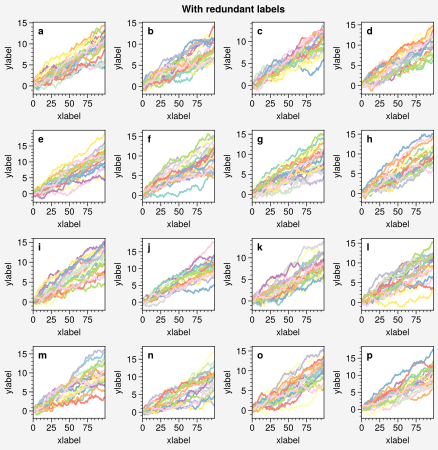

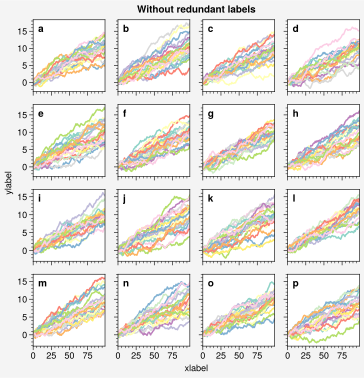

In [8]:
import proplot as pplt
import numpy as np
pplt.rc.reset()
pplt.rc.cycle = 'Set3'
state = np.random.RandomState(51423)

# Same plot with and without default sharing settings
titles = ('With redundant labels', 'Without redundant labels')
for b in (False, True):
    fig = pplt.figure(refwidth=1, share=b, span=b)
    axs = fig.subplots(nrows=4, ncols=4)
    for ax in axs:
        ax.plot((state.rand(100, 20) - 0.4).cumsum(axis=0))
    axs.format(
        abc=True, abcloc='ul', suptitle=titles[b],
        xlabel='xlabel', ylabel='ylabel',
        grid=False, xticks=25, yticks=5
    )

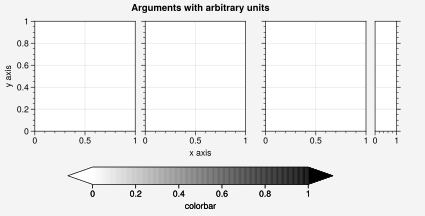

In [9]:
import proplot as pplt
import numpy as np
with pplt.rc.context(fontsize='12px'):
    fig, axs = pplt.subplots(
        ncols=3, figwidth='15cm', figheight='3in',
        wspace=('10pt', '20pt'), right='10mm',
    )
    cmap = pplt.Colormap('Mono')
    cb = fig.colorbar(
        cmap, loc='b', extend='both', label='colorbar',
        width='2em', extendsize='3em', shrink=0.8,
    )
    pax = axs[2].panel_axes('r', width='5en')
axs.format(
    suptitle='Arguments with arbitrary units',
    xlabel='x axis', ylabel='y axis',
    xlim=(0, 1), ylim=(0, 1),
)